In [1]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

In [23]:
env = gym.make('Pong-v0')
env.reset()
for _ in range(100):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

In [3]:
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
# screen shape: (210, 160, 3)
screen = env.render(mode='rgb_array')
screen.shape

(210, 160, 3)

In [25]:
env.action_space

Discrete(6)

In [26]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [28]:
action = env.action_space.sample()
(next_state, reward, done, info) = env.step(action)

In [29]:
reward

0.0

In [30]:
done

False

In [31]:
info

{'ale.lives': 0}

In [32]:
next_state.shape

(210, 160, 3)

In [49]:
torch_next_state = torch.tensor(next_state, dtype=torch.float)
torch_next_state.shape

torch.Size([210, 160, 3])

In [56]:
test = torch.mean(torch_next_state, dim=2).unsqueeze(0)
test.shape

torch.Size([1, 210, 160])

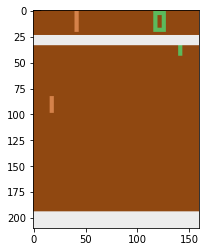

In [57]:
plt.imshow(next_state)

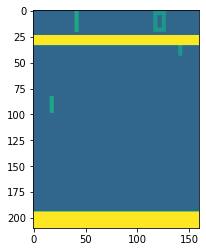

In [59]:
plt.imshow(test[0])